
## Overview, motivations of Dynamic Systems

* Ref: From J. Nathan Kutz



## A Dynamical System can be of the form:



$  \Large \frac{d}{dt} x(t) = F(x(t), t; \beta)   $


where:

* $ x $ is the state of the system
* $ F $ is the vector field that possibly depends on the state of $ x $ , time $ t $, and a set of parameters $ \beta $.



## For example, consider the Lorenz Equations


* The Lorenz system is a dynamical system
* It exhibits chaos. 
* It has a sensitive dependence on initial conditions. 
* Two trajectories with nearby initial conditions will rapidly diverge in behavior. After a long time, only statistical stementes can be made about them. 



## From Wikipedia

* Source: https://en.wikipedia.org/wiki/Lorenz_system
    
    In 1963, Edward Lorenz (and others) developed a simplified mathematical model for atmospheric convection. The model is a system of three ordinary differential equations (ODE) now known as the Lorenz equations:


$  \Large \frac{dx}{dt} = \sigma (y-x)   $

$  \Large \frac{dy}{dt} = x(\rho -z)-y  $

$  \Large \frac{dz}{dt} = xy-\beta z  $




* The equations relate the properties of a two-dimensional fluid layer uniformly warmed from below and cooled from above. 
* In particular, the equations describe the rate of change of three quantities with respect to time.
* x is proportional to the rate of convection
* y is proportional to the horizontal temperature variation
* z is proportional to the vertical temperature variation.

* The constants σ, ρ, and β are system parameters proportional to the Prandtl number, Rayleigh number, and certain physical dimensions of the layer itself.

* The Lorenz equations can arise in simplified models for lasers, dynamos, thermosyphons, brushless DC motors, electric circuits, chemical reactions,  and forward osmosis.


* From a technical standpoint, the Lorenz system is nonlinear, aperiodic, three-dimensional and deterministic. 



## The code


In [19]:

## !pip install matplotlib
## !pip install scipy


In [20]:

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy import integrate
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D




## Simulate the Lorenz System


In [21]:

dt = 0.001



## The parameters


In [22]:

sigma = 10
beta  = 8/3
rho   = 28



## The state vector

* The initial condition


In [23]:

x0 = (0, 1, 20)



## The simulation

* The time span


In [24]:

np.random.seed(123)

t = np.arange(0, 50+dt, dt)



## The function Lorenz

The vector field is defined in the function lorenz as a Dynamic System

$  \Large \frac{d}{dt} x(t) = F(x(t), t; \beta)   $




In [25]:

def lorenz(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    
    x_dot = sigma * (y-x)
    y_dot = x * (rho-z) - y
    z_dot = x * y - beta * z
    
    return [x_dot, y_dot, z_dot]



## Now we simulate the equations

* Uses a fourth-order Range-Kutta integration scheme with adaptive time step


In [26]:

x_t = integrate.odeint(
           lorenz,
           x0,
           t,
           rtol = 10**(-12),
           atol = 10**(-12)*np.ones_like(x0)
)



In [27]:

x, y, z = x_t.T


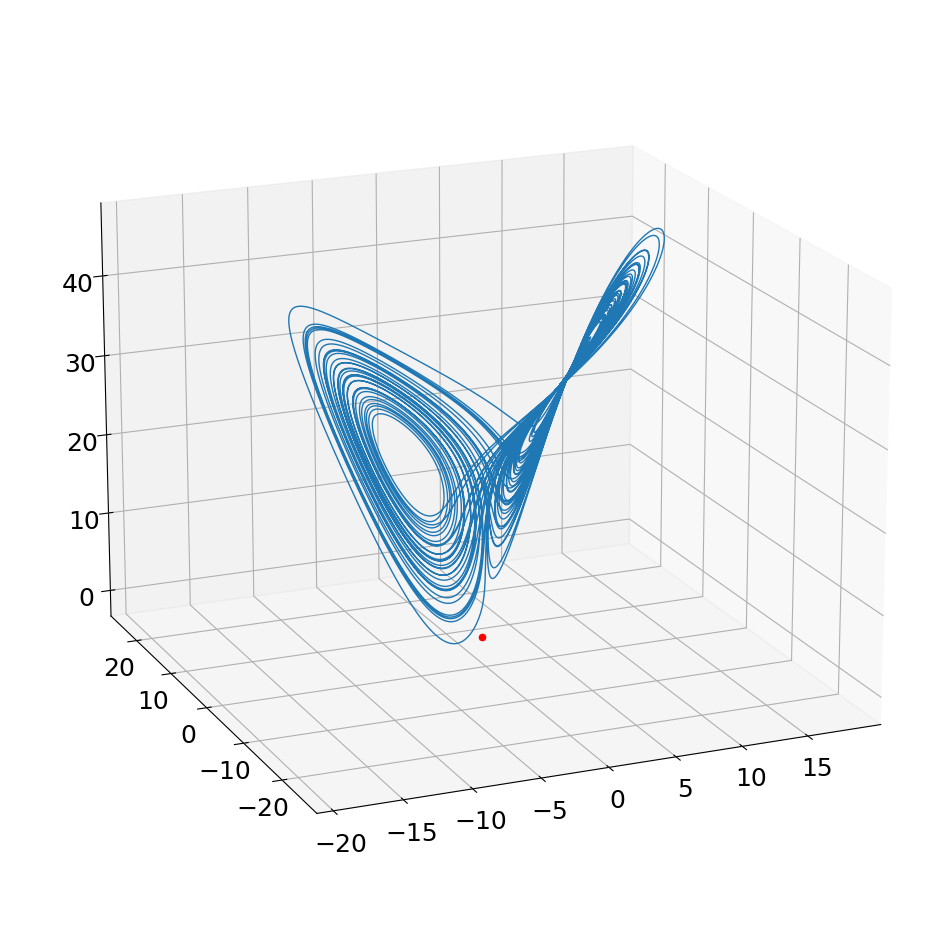

In [28]:

rcParams.update({'font.size': 18})

plt.rcParams['figure.figsize'] = [12, 12]

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})

plt.plot(x, y, z,linewidth=1)

plt.scatter(x0[0],x0[1],x0[2],color='r')  ## the red dot in the plot
             
ax.view_init(18, -113)
plt.show()

